# Capstone Project

### Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split

### Function to load images (resize)

In [2]:
def load_images(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        resize_img = cv2.resize(img, (299 , 299))
        if resize_img is not None:
            images[filename] = resize_img
    return images

### Load images

In [3]:
train = load_images('all/train')
train_df = pd.DataFrame(list(train.items()), columns = ('id','pixels'))
for idx,id_ in enumerate(train_df.id):
    train_df.id[idx] = str(id_.split(".")[0])

In [4]:
labels = pd.read_csv('all/labels.csv')

In [5]:
data = train_df.merge(labels, on = 'id', how = 'inner')

### Data Augmentation

### Salt Pepper

In [6]:
def salt_pepper_aug(data):
    
    pixels = data['pixels'].copy(deep=True)
    breed = data['breed'].copy()
    row, col, lyr = pixels[0].shape
    salt_pepper = 0.2
    amount = 0.005
    salt = np.ceil(amount * pixels[0].size * salt_pepper)
    pepper = np.ceil(amount * pixels[0].size * (1.0 - salt_pepper))
    
    for img in pixels:
        coords = [np.random.randint(0, i - 1, int(salt)) for i in img.shape]
        img[coords[0], coords[1], :] = 1

        coords = [np.random.randint(0, i - 1, int(pepper)) for i in img.shape]
        img[coords[0], coords[1], :] = 0
    aug_data = pixels.to_frame().join(breed.to_frame())
    return aug_data

In [7]:
salt_pepper_noise = salt_pepper_aug(data)

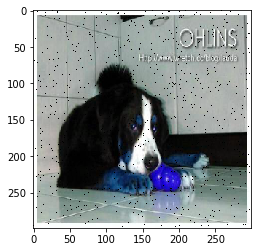

In [8]:
plt.imshow(salt_pepper_noise['pixels'][0])

### Rotation (at 90 degrees):

In [9]:
j=data['pixels'][0]
flip_v=cv2.flip(j,0)  #vertical flipping
flip_h=cv2.flip(j,1)  #horizontal flipping(mirror image)
flip_hv=cv2.flip(j,-1) #vertical and horizontal flipping
r_90=cv2.transpose(j) #rotates by 90 degrees
resized = cv2.resize(j, (500,500), interpolation = cv2.INTER_LINEAR) #scaling up and down

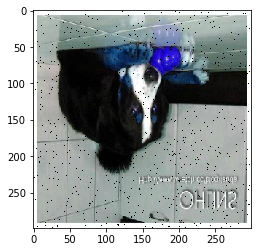

In [10]:
plt.imshow(flip_v)

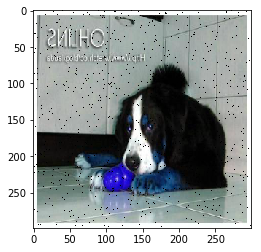

In [11]:
plt.imshow(flip_h)

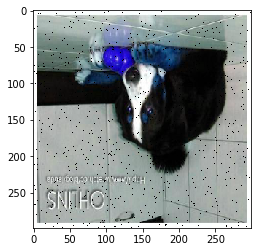

In [12]:
plt.imshow(flip_hv)

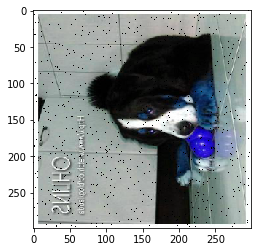

In [13]:
plt.imshow(r_90)

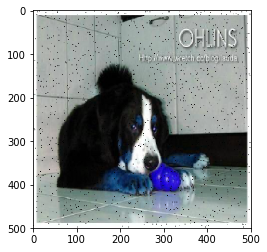

In [14]:
plt.imshow(resized)